In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data from https://archive.ics.uci.edu/ml/datasets/bank+marketing#

In [188]:
df1= pd.read_csv("bank-full.csv")
df1_part= pd.read_csv("bank.csv")
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [189]:
df2= pd.read_csv("bank-additional/bank-additional-full.csv")
df2_part= pd.read_csv("bank-additional/bank-additional.csv")
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


There are four datasets: <br>
- bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
- bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.
- bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
- bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).</p>
The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

In [190]:
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [191]:
print("df1 rows and cols=",df1.shape,"vs","df1_part rows and cols=",df1_part.shape)

df1 rows and cols= (45211, 17) vs df1_part rows and cols= (4521, 17)


In [192]:
print("df2 rows and cols=",df2.shape,"vs","df2_part rows and cols=",df2_part.shape)

df2 rows and cols= (41188, 21) vs df2_part rows and cols= (4119, 21)


<b>df1 data dictionary</b> <br>
- <u>age:</u> age of the customer
- <u>job:</u> job of the customer
- <u>marital:</u> customer married or single
- <u>education:</u> customer's education
- <u>default:</u> has credit in default?
- <u>balance:</u> balance in customer's account
- <u>housing:</u> has housing loan?
- <u>loan:</u> has personal loan?
- <u>contact:</u> how to contact them?
- <u>day:</u> last day of contact
- <u>month:</u> last month of contact
- <u>duration:</u> how long was the contact in seconds? ( Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.)
- <u>campaign:</u> number of contacts performed during this campaign and for this client
- <u>pdays:</u> number of days that passed by after the client was last contacted from a previous campaign (numeric; -1 means client was not previously contacted)
- <u>previous:</u> number of contacts performed before this campaign and for this client 
- <u>poutcome:</u> outcome of the previous marketing campaign
- <u>y:</u> has the client subscribed a term deposit? (output variable)</br></br>

<b>df2 data dictionary</b>
- <u>age</u> (numeric)
- <u>job:</u> type of job 
- <u>marital:</u> marital status 
- <u>education:</u> 
- <u>default:</u> has credit in default? 
- <u>housing:</u> has housing loan? 
- <u>loan:</u> has personal loan? 
- <u>contact:</u> contact communication type  
- <u>month:</u> last contact month of year 
- <u>day_of_week:</u> last contact day of the week 
- <u>duration:</u> last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- <u>campaign:</u> number of contacts performed during this campaign and for this client (numeric, includes last contact)
- <u>pdays:</u> number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- <u>previous:</u> number of contacts performed before this campaign and for this client (numeric)
- <u>poutcome:</u> outcome of the previous marketing campaign 
- <u>emp.var.rate:</u> employment variation rate - quarterly indicator (numeric)
- <u>cons.price.idx:</u> consumer price index - monthly indicator (numeric)     
- <u>cons.conf.idx:</u> consumer confidence index - monthly indicator (numeric)     
- <u>euribor3m:</u> euribor 3 month rate - daily indicator (numeric)
- <u>nr.employed:</u> number of employees - quarterly indicator (numeric)

In [193]:
df1.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [194]:
df2.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [195]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [196]:
df2.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [197]:
df1[df1=="unknown"].count()

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

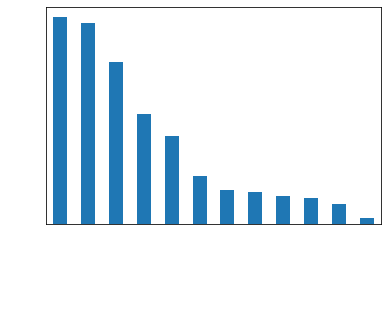

In [198]:
df1['job'].value_counts().plot(kind='bar')

In [199]:
df1["job"]=df1["job"].replace("unknown", "blue-collar")

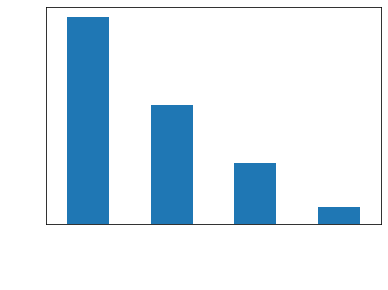

In [200]:
df1['education'].value_counts().plot(kind='bar')

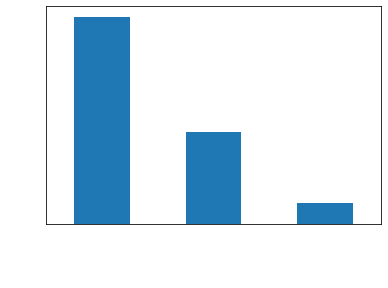

In [201]:
df1['contact'].value_counts().plot(kind='bar')

In [202]:
df1["education"]=df1["education"].replace("unknown", "secondary")

In [203]:
df1[df1=="unknown"].count()

age              0
job              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [204]:
del df1["contact"]

In [205]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,unknown,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,unknown,no


In [206]:
df1["poutcome"].where(df1.previous==1).unique()

array([nan, 'other', 'failure', 'success', 'unknown'], dtype=object)

In [207]:
df1["poutcome"].where(df1.previous==0).unique()

array(['unknown', nan], dtype=object)

In [208]:
df1["poutcome"].where(df1.pdays==-1).unique()

array(['unknown', nan], dtype=object)

we can conclude that the customers who have poutcome as "unknown" are potentially new costumers

In [209]:
df1["poutcome"]=df1["poutcome"].replace("unknown", "newly joined")

In [210]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,newly joined,no
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,newly joined,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,newly joined,no
3,47,blue-collar,married,secondary,no,1506,yes,no,5,may,92,1,-1,0,newly joined,no
4,33,blue-collar,single,secondary,no,1,no,no,5,may,198,1,-1,0,newly joined,no


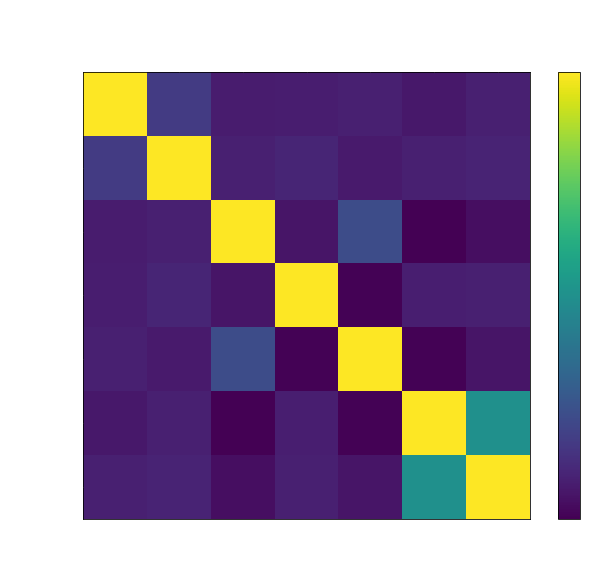

In [211]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR
f = plt.figure(figsize=(10, 8))
plt.matshow(df1.corr(), fignum=f.number)
plt.xticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(df1.select_dtypes(['number']).shape[1]), df1.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', y=-0.09, fontsize=20);

In [212]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    COLOR = 'white'
    plt.rcParams['text.color'] = COLOR
    plt.rcParams['axes.labelcolor'] = COLOR
    plt.rcParams['xtick.color'] = COLOR
    plt.rcParams['ytick.color'] = COLOR
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.1, 0.2), xycoords='axes fraction', ha='left', va='center', size=textSize, weight="bold",color="black")
    plt.suptitle('Scatter and Density Plot',y=0.09, fontsize=20)
    plt.show()

<ipython-input-212-fd6eefaad65e>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only
  df = df.dropna('columns')


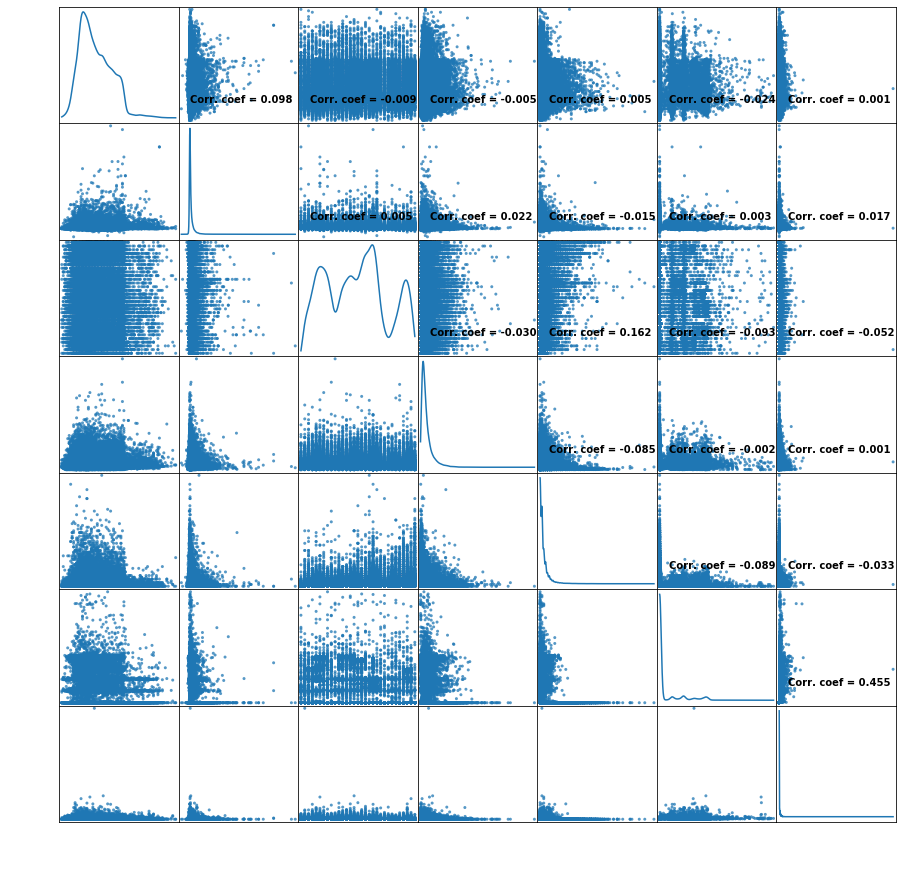

In [213]:
plotScatterMatrix(df1, 15, 10)

In [214]:
df1.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


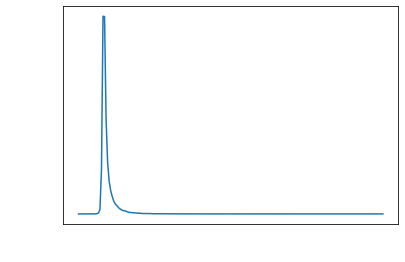

In [215]:
sns.kdeplot(data=df1["balance"])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


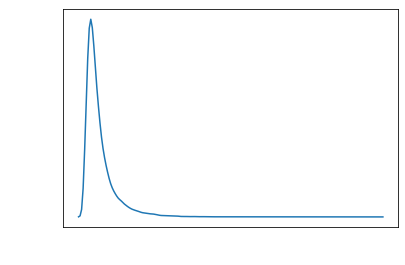

In [216]:
sns.kdeplot(data=df1["duration"])

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


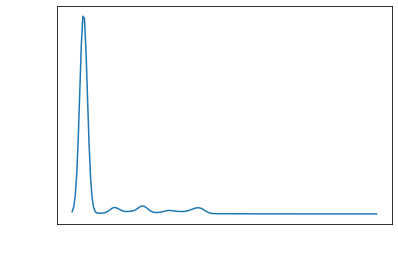

In [217]:
sns.kdeplot(data=df1["pdays"])

In [218]:
df1.y.replace(('yes', 'no'), (1, 0), inplace=True)

In [219]:
df1.groupby("y").mean().reset_index()

,y,age,balance,day,duration,campaign,pdays,previous
0,0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


#### Observations from the above cell:- 
- age,day(obviously),campaign features don't seem to be big defining factors in deciding whether a customer is likely to participate in the campaign or not
- on the other hand, duration,pdays and previous contribute to the likelihood of paricipation
- balance has a minimal effect in likelihood <br><br>
<i> to understand the meaning of the features, check the data dictionary cell

In [220]:
plot_occupation=df1[['job', 'y']].groupby("job").mean().reset_index()

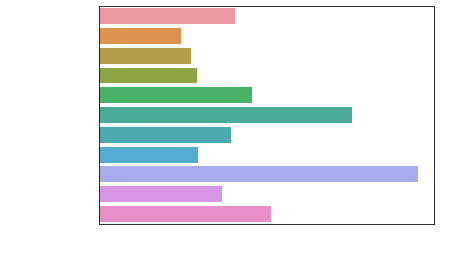

In [221]:
sns.barplot(data=plot_occupation,y="job",x="y")

students participated the most, followed by retired and unemployed people

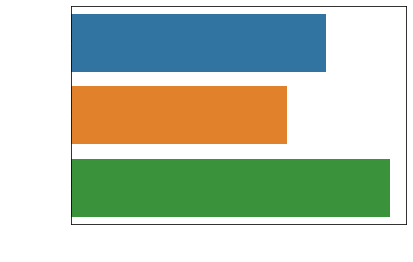

In [222]:
plot_marital = df1[['marital', 'y']].groupby("marital").mean().reset_index()
sns.barplot(y = "marital", x = 'y',data = plot_marital)

singles showed more participation

[None, None]

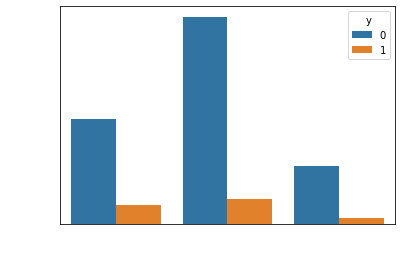

In [223]:
ax=sns.countplot(x = df1['education'], hue = df1["y"])
plt.setp(ax.get_legend().get_texts(), color='black')
plt.setp(ax.get_legend().get_title(), color='black')

customers who have had secondary education participated the most in the campaign but this wasnt a strong metric because many of them also denied participation

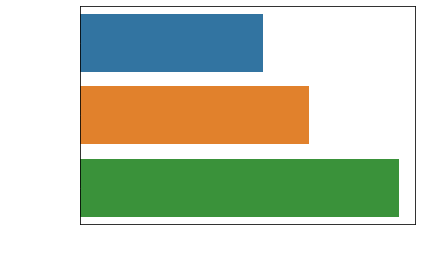

In [224]:
plot_edu = df1[['education', 'y']].groupby("education").mean().reset_index()
sns.barplot(y = "education", x = 'y',data = plot_edu)

this graph shows that despite fewer ppl with tertiary education participated in the campaign, but the ratio between the participating and non-participating candidates, the participating ones were stronger in this category 

In [225]:
corr=pd.DataFrame(abs(df1.corr()['y']))


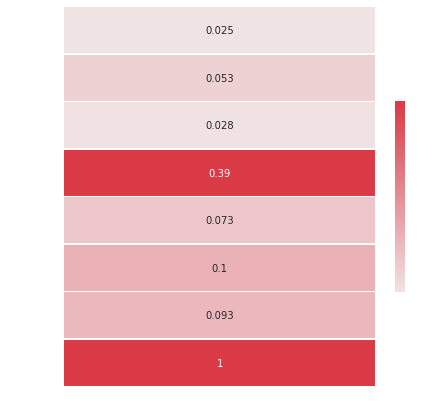

In [226]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(7, 7))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square= False, linewidths=.5, annot=True, cbar_kws={"shrink": .5})

### Classification using Randon forest 

In [227]:
df1.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y             int64
dtype: object

In [228]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in df1.columns:
    if(df1[col].dtype == 'object'):
        df1.loc[:,col] = le.fit_transform(df1.loc[:,col])

In [229]:
X=df1.iloc[:,:-1].values
print(X)

[[ 58   4   1 ...  -1   0   1]
 [ 44   9   2 ...  -1   0   1]
 [ 33   2   1 ...  -1   0   1]
 ...
 [ 72   5   1 ... 184   3   3]
 [ 57   1   1 ...  -1   0   1]
 [ 37   2   1 ... 188  11   2]]


In [230]:
y = df1.iloc[:,-1].values
print(y)

[0 0 0 ... 1 0 0]


In [231]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [232]:
from sklearn import model_selection

In [233]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, n_jobs=-1)
results = model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8685035562089187


In [234]:
from sklearn.ensemble import RandomForestClassifier
seed = 7
num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, n_jobs=-1)
results=  model_selection.cross_val_score(model, X, y, cv=kfold)
print(results.mean())

0.8863092437757416
